## Group Assignment: Jordi, Allison, Annalaura, Mahmmoud - Predict survival on Titanic

**Instructions**

The task is to predict survival on board of the Titanic:

https://www.kaggle.com/c/titanic/

 
The key column is the Age, which has some missing values, so you will need some imputation strategy.

 

**Scoring for this assignment goes as follows:**

1 point for the preliminary data analysis (proper data reading, basic statistics, visualization)

2 points for feature engineering (imputation of missing values in the Age column, creation of new features)

1 point for the machine learning process (algorithm selection, final test score)

**Rules:**

Datasets train.csv and test.csv from https://www.kaggle.com/c/titanic/data must be used, no other sources
You cannot use machine learning algorithms for the feature engineering part, only manual techniques. This rules out KNN for imputation, Deep Learning, sklearn.preprocessing.Imputer, fancyimpute, missingno, and similar
The format of the delivery *must*:

- be a Jupyter notebook
- whose name should contain the surnames of the students in the group
- run, top to bottom, without errors on a capable computer with Python 3.6
- If you don't manage to get it working, document what approaches did you try, and explain the errors. Do not deliver an unfinished notebook without explanations.

 

Good luck!



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
sns.set()

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Set-up

In [4]:
# We begin by importing the data.

titanic = pd.read_csv('/home/al1190/Desktop/dsf/Assignments/train.csv', index_col= 'PassengerId')

# Next, we check the head, info and describe

titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

From the kaggle challenge page, we can retrieve the defenition of the variables

Survived: Survival, 0 = No, 1 = Yes

Pclass: Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd

Sex: Sex

Age: Age in years

Sibsp: number of siblings / spouses aboard the Titanic

Parch:number of parents / children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

The first thing to do is to make sure that numerical and categorical variable have the correct datatype. The categorical variables are: Survived, Pclass, Sex, Embarked

In [6]:
titanic["Pclass"] = titanic["Pclass"].astype(object)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null object
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 83.5+ KB


We can see that Age and Cabin have a lot of missing observetion, but we will come back to it later.


## Exploratory Data Analysis

For the moment, we focus on the Survived variable, which is the variable we are trying to predict and see how it is affected by ther variables


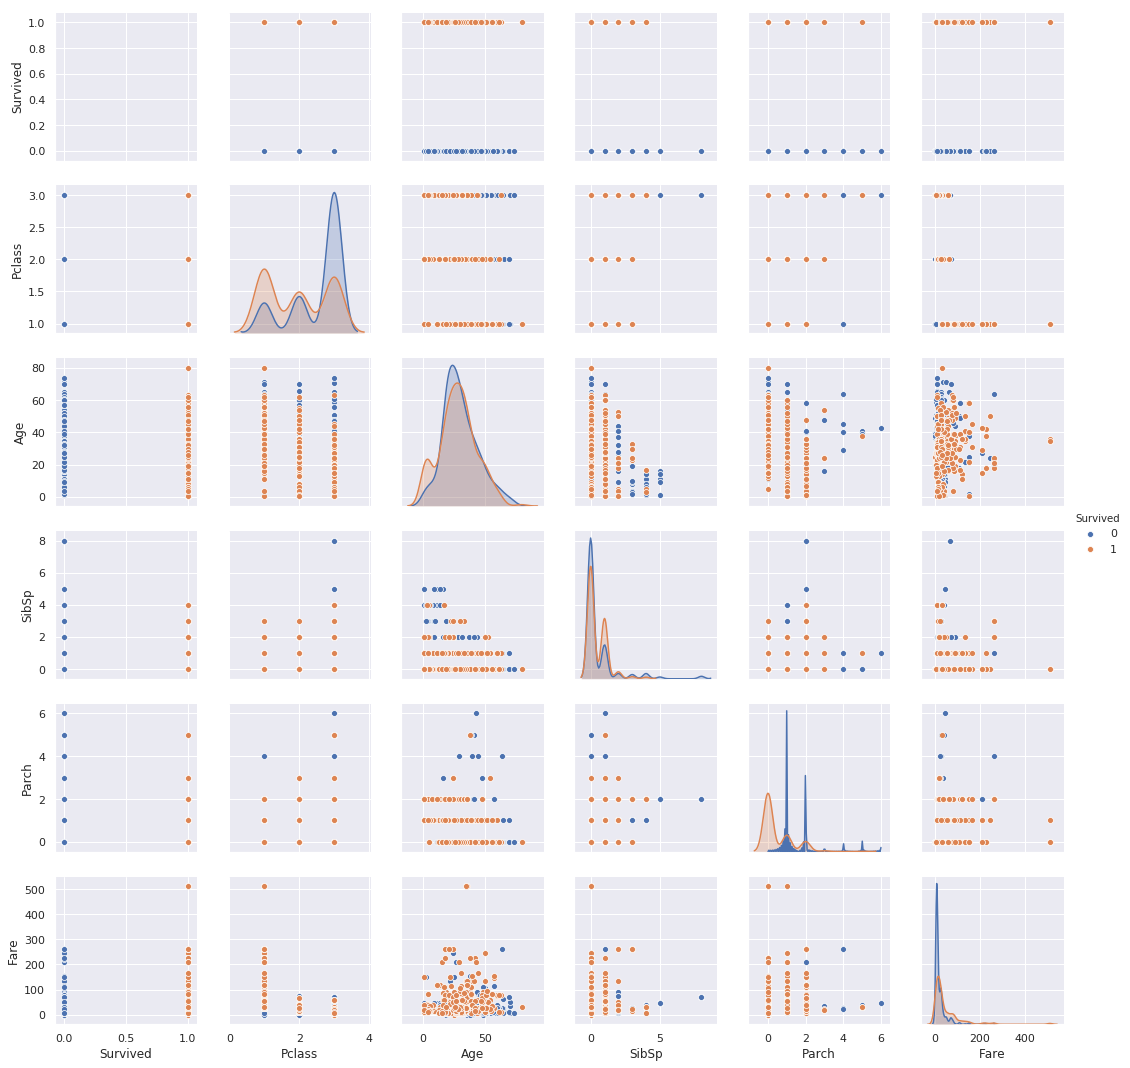

In [8]:
# We run a pairplot just to get a sense for the variables and distributions

sns.pairplot(data = titanic, hue = 'Survived')

In [9]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
titanic["Survived"].mean() #average survival rate

0.3838383838383838

### Survived vs. Sex 

In [11]:
titanic.groupby("Sex", as_index=False)["Survived"].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


On average, female are more likely to survive.

### Survived vs. Fare 

First, we look at the distribution of Fare



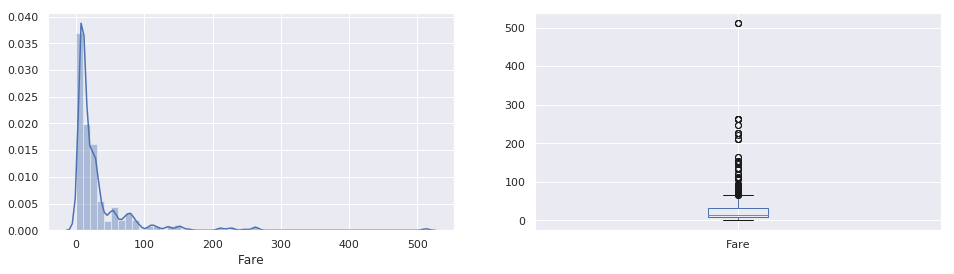

In [12]:
fig, ax = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(titanic['Fare'], ax = ax[0]);
titanic["Fare"].plot.box(ax = ax[1]);

We can see that it is very skewed and has a large number of outliers.

In [13]:
titanic.groupby("Survived", as_index=False)["Fare"].median() 
# We are considering the average because it is robust to outliers

,Survived,Fare
0,0,10.5
1,1,26.0


From this table, it looks like that those who survived on payed a higher fare, more than double the fare payed by those who died.


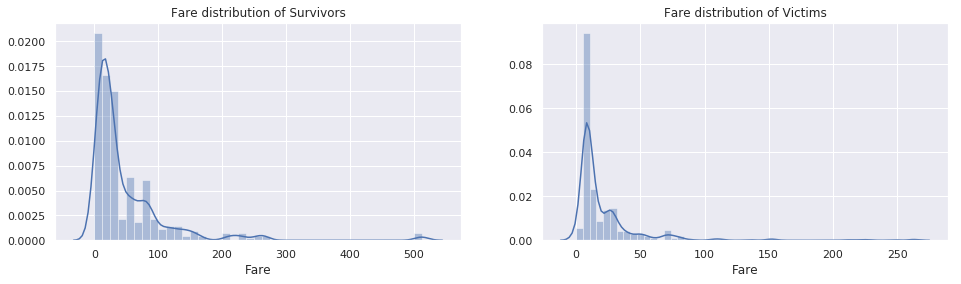

In [14]:
fig, ax = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(titanic["Fare"].loc[(titanic["Survived"]==1)] , 
             ax=ax[0]).set_title("Fare distribution of Survivors");
sns.distplot(titanic["Fare"].loc[(titanic["Survived"]==0)] , 
             ax=ax[1]).set_title("Fare distribution of Victims");

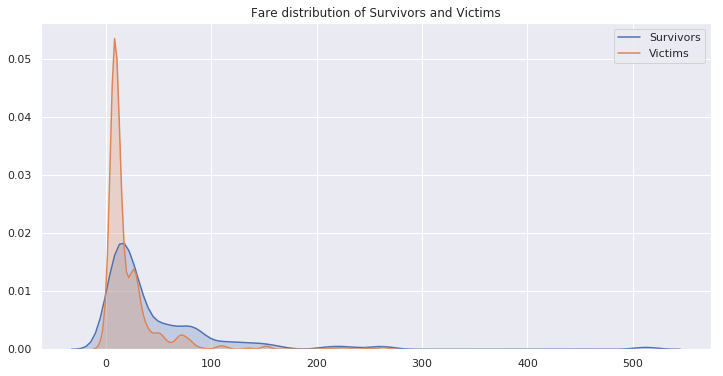

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(titanic["Fare"].loc[(titanic["Survived"]==1)], shade=True, label="Survivors");
sns.kdeplot(titanic["Fare"].loc[(titanic["Survived"]==0)], shade=True, label="Victims");
plt.title("Fare distribution of Survivors and Victims");

As you can see, the victims fare distribution is more concentrated on the lower fares.


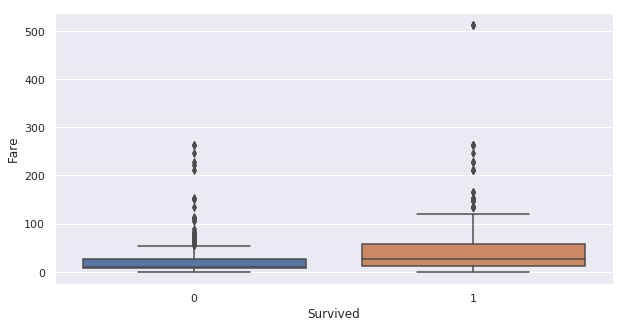

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Survived", y="Fare", data=titanic, ax=ax);

In [17]:
titanic['Survived'].corr(titanic['Fare'])

0.25730652238496227

### Survived vs. Pclass 

In [18]:
titanic.groupby("Pclass", as_index=False)["Survived"].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


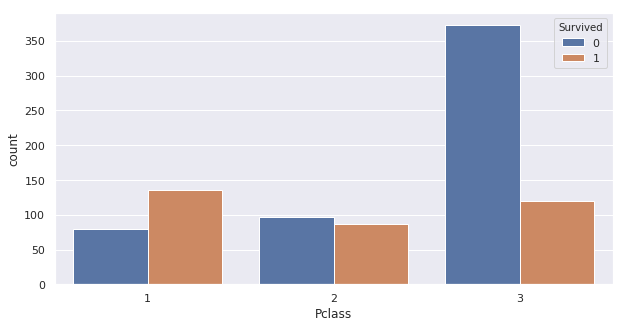

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=titanic, x='Pclass', hue='Survived');

We can clearly see that the majority of the victims were in the third class, so they were the poorest, while first class passenger were the only ones where the survivors exceeded the victims.

It is interesting to analyse the passenger class together with the port of embarkment.

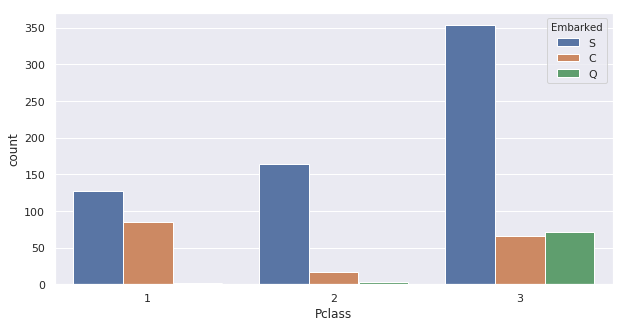

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=titanic, x='Pclass', hue='Embarked');

A great number of passengers embarked in Queenstown and most of them paid the lowest fare

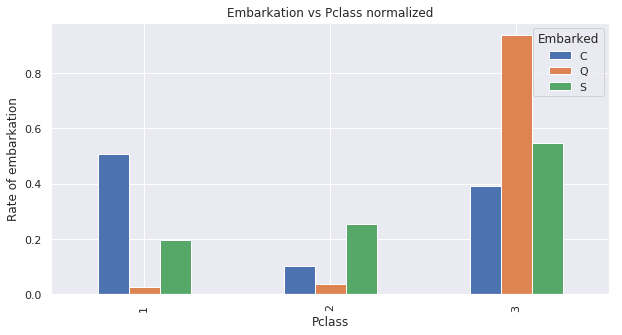

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Embarkation vs Pclass normalized')
plt.ylabel('Rate of embarkation')
titanic.groupby('Embarked')['Pclass'].value_counts(normalize=True).unstack().T.plot.bar(ax=ax);

By seeing the percentage of each Pclass according to where they embarked, we can conclude that in the UK locations (Queenstown and Southampton) most of the people who embark corresponded to the poorest class while in France(Cherbourg) the highest percentage of passengers relate to the top class.

### Survived vs. Age 

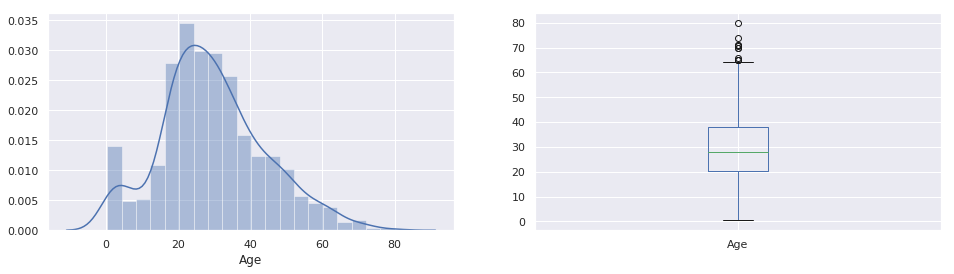

In [22]:
fig, ax = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(titanic["Age"].loc[titanic["Age"].notna()], ax=ax[0]);
titanic["Age"].plot.box(ax = ax[1]);

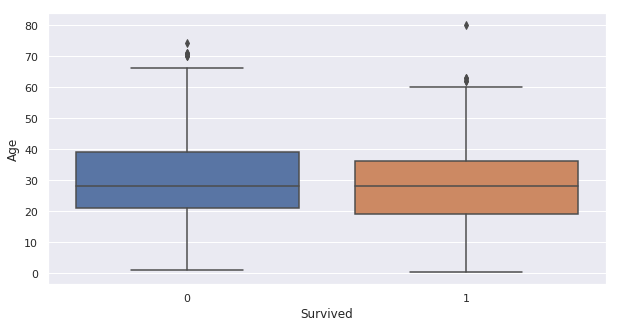

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Survived", y="Age", data=titanic, ax=ax);

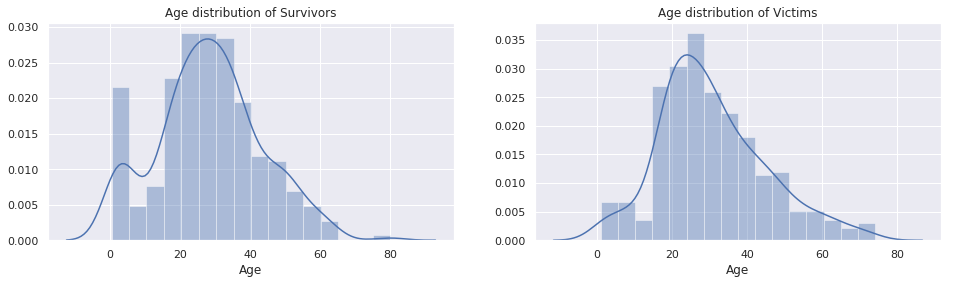

In [24]:
fig, ax = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna())] , 
             ax=ax[0]).set_title("Age distribution of Survivors");
sns.distplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna())] , 
             ax=ax[1]).set_title("Age distribution of Victims");

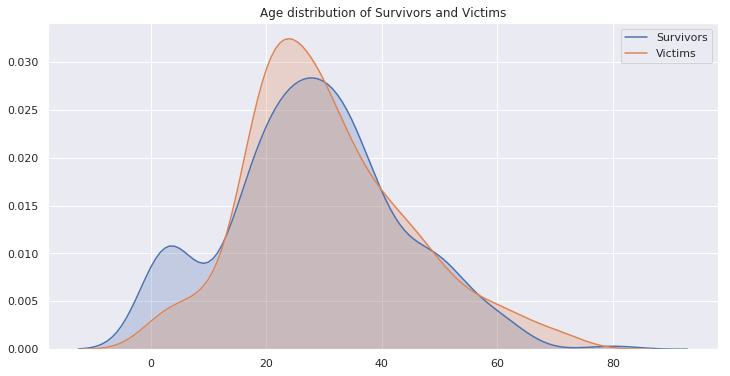

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna())], 
            shade=True, label="Survivors");
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna())], 
            shade=True, label="Victims");
plt.title("Age distribution of Survivors and Victims");

In [26]:
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

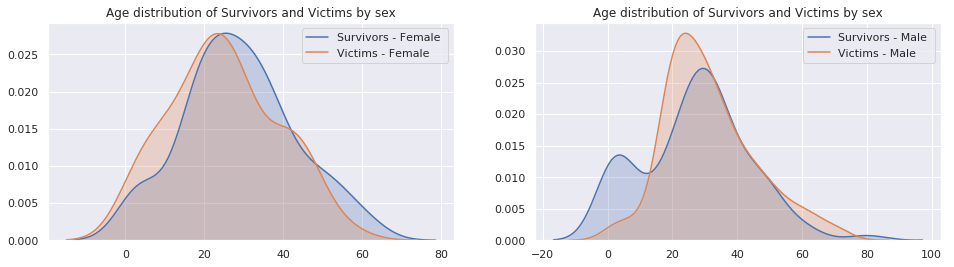

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")], 
            shade=True, label="Survivors - Female ", ax=ax[0]);
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")], 
            shade=True, label="Victims - Female", ax=ax[0]).set_title("Age distribution of Survivors and Victims by sex");
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")], 
            shade=True, label="Survivors - Male ", ax=ax[1]);
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")], 
            shade=True, label="Victims - Male", ax=ax[1]).set_title("Age distribution of Survivors and Victims by sex");

We can see that there were more male children who survived, compared to those who died, than female childred. The latter were more likely to die than to survive. Instead teeenage and young adult women had more chances to survive than teenage and young adult men.



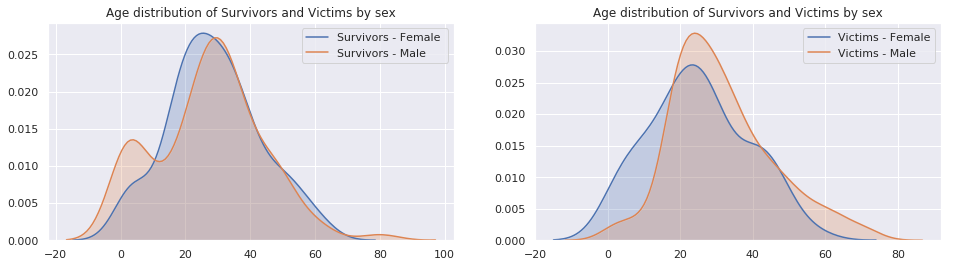

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")], 
            shade=True, label="Survivors - Female ", ax=ax[0]);
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")], 
            shade=True, label="Victims - Female", ax=ax[1]);
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")], 
            shade=True, label="Survivors - Male ", ax=ax[0]).set_title("Age distribution of Survivors and Victims by sex");
sns.kdeplot(titanic["Age"].loc[(titanic["Survived"]==0) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")], 
            shade=True, label="Victims - Male", ax=ax[1]).set_title("Age distribution of Survivors and Victims by sex");


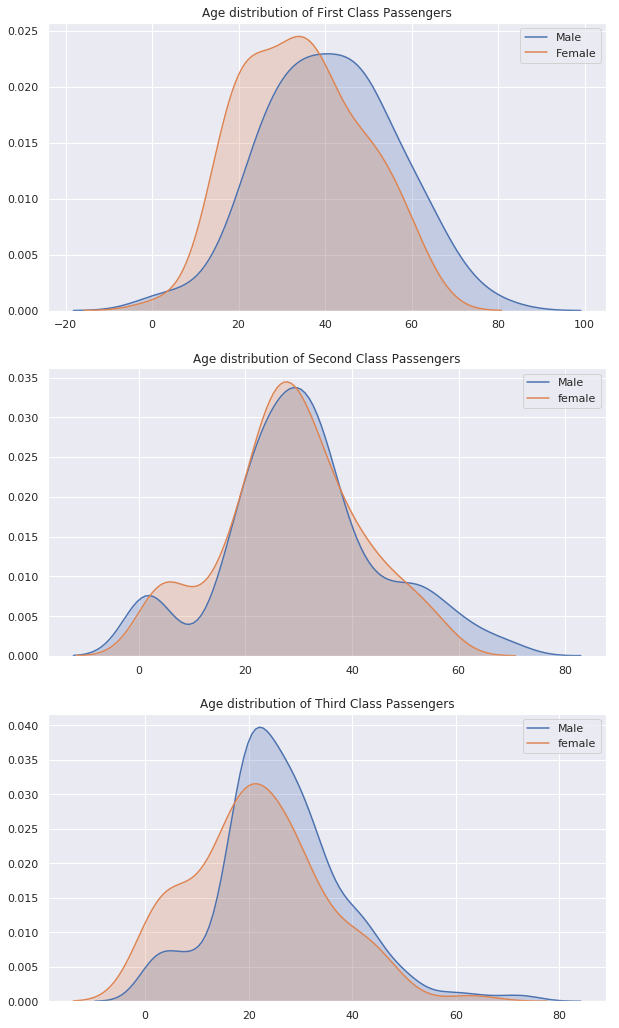

In [29]:

fig, ax = plt.subplots(nrows=3,figsize=(10,18))
sns.kdeplot(titanic["Age"].loc[(titanic["Pclass"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")] , 
             label="Male", shade=True, ax=ax[0]).set_title("Age distribution of First Class Passengers");
sns.kdeplot(titanic["Age"].loc[(titanic["Pclass"]==1) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")] , 
             label="Female", shade=True, ax=ax[0]).set_title("Age distribution of First Class Passengers");



sns.kdeplot(titanic["Age"].loc[(titanic["Pclass"]==2) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")] , 
             label="Male", shade=True, ax=ax[1]).set_title("Age distribution of Second Class Passengers");
sns.kdeplot(titanic["Age"].loc[(titanic["Pclass"]==2) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")] , 
             label="female", shade=True, ax=ax[1]).set_title("Age distribution of Second Class Passengers");



sns.kdeplot(titanic["Age"].loc[(titanic["Pclass"]==3) & (titanic["Age"].notna()) & (titanic["Sex"]=="male")] , 
             label="Male", shade=True, ax=ax[2]).set_title("Age distribution of Third Class Passengers");
sns.kdeplot(titanic["Age"].loc[(titanic["Pclass"]==3) & (titanic["Age"].notna()) & (titanic["Sex"]=="female")] , 
             label="female", shade=True, ax=ax[2]).set_title("Age distribution of Third Class Passengers");



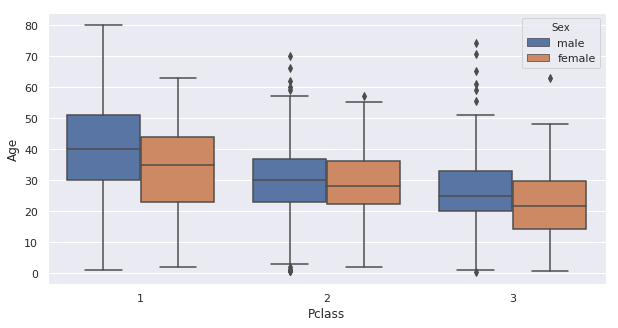

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=titanic, ax=ax);

In [31]:
titanic.groupby(["Sex", "Pclass"])["Age"].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

This could be a criteria to fill in for the age missing value. 

In [32]:
titanic.groupby(["Sex", "Pclass"])["Age"].transform("median")


PassengerId
1      25.0
2      35.0
3      21.5
4      35.0
5      25.0
6      25.0
7      40.0
8      25.0
9      21.5
10     28.0
11     21.5
12     35.0
13     25.0
14     25.0
15     21.5
16     28.0
17     25.0
18     30.0
19     21.5
20     21.5
21     30.0
22     30.0
23     21.5
24     40.0
25     21.5
26     21.5
27     25.0
28     40.0
29     21.5
30     25.0
       ... 
862    30.0
863    35.0
864    21.5
865    30.0
866    28.0
867    28.0
868    40.0
869    25.0
870    25.0
871    25.0
872    35.0
873    40.0
874    25.0
875    28.0
876    21.5
877    25.0
878    25.0
879    25.0
880    35.0
881    28.0
882    25.0
883    21.5
884    30.0
885    25.0
886    21.5
887    30.0
888    35.0
889    21.5
890    40.0
891    25.0
Name: Age, Length: 891, dtype: float64

In [33]:
titanic["Age"] = titanic["Age"].fillna(titanic.groupby(["Sex", "Pclass"])["Age"].transform("median"))

.transform() transforms the value in each cell into the argument, in this case the median. When applied in fillna, it transform each cell, but change only the NaN ones.

In [34]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null object
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 123.5+ KB


## Feature Engineering

Now we can prepare the feature matrix. First we need to drop the non numerical variables and the irrelevant ones.

We create one massive feature matric, which we then experiment with. 

In [36]:
feat = titanic.drop(columns=["Ticket", "Cabin", "Name", "Pclass", "Sex", "Embarked"])

In [37]:
feat.head()

,Survived,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,0,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,1,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,0,35.0,0,0,8.0500


Then we need to tranform the categorical variables into dummies, so that we can use them properly in the prediction

In [38]:
sex = pd.get_dummies(titanic['Sex'])
embark = pd.get_dummies(titanic['Embarked'])
pclass = pd.get_dummies(titanic['Pclass'])
pclass.columns = ["D1C", "D2C", "D3C"]

In [39]:
# Splitting the name data by punctuation

NameSplit = titanic['Name'].str.split('[,.]')
NameSplit.head()

PassengerId
1                          [Braund,  Mr,  Owen Harris]
2    [Cumings,  Mrs,  John Bradley (Florence Briggs...
3                           [Heikkinen,  Miss,  Laina]
4     [Futrelle,  Mrs,  Jacques Heath (Lily May Peel)]
5                         [Allen,  Mr,  William Henry]
Name: Name, dtype: object

In [40]:
titanic['title'] = [name[1] for name in NameSplit]
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [41]:
# We only need the second value from each of these lists (the title)

titles = pd.get_dummies(titanic['title'])

In [42]:
titles.head()

,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
PassengerId,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0



Now that we have filled in the missing value of the variable age, we could create age classes.

In [44]:
age_bins = [0,12,18,30,60,titanic["Age"].max()]
age_labels = ["children", "teenagers", "young adults", "adults", "elderly"]

In [45]:
titanic["Age Class"] = pd.cut(titanic["Age"], bins=age_bins, labels=age_labels, include_lowest=True)

In [46]:
age_dummies = pd.get_dummies(titanic["Age Class"])
age_dummies.head()

,children,teenagers,young adults,adults,elderly
PassengerId,,,,,
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,0,1,0
5,0,0,0,1,0


In [47]:
titanic.groupby("Age Class", as_index=False)["Survived"].mean()

,Age Class,Survived
0,children,0.579710
1,teenagers,0.428571
2,young adults,0.321343
3,adults,0.424920
4,elderly,0.227273


In [48]:
titanic.groupby(["Sex", "Age Class"])["Age"].mean()

Sex     Age Class   
female  children         4.796875
        teenagers       16.347222
        young adults    23.791045
        adults          40.752294
        elderly         62.666667
male    children         4.747838
        teenagers       16.823529
        young adults    24.782686
        adults          40.948529
        elderly         66.552632
Name: Age, dtype: float64

Now, we merge the dummies into the features matrix

In [49]:
feat = feat.join([sex, pclass, embark, titles, age_dummies])
feat.head()

,Survived,Age,SibSp,Parch,Fare,female,male,D1C,D2C,D3C,...,Mrs,Ms,Rev,Sir,the Countess,children,teenagers,young adults,adults,elderly
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,38.0,1,0,71.2833,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,35.0,1,0,53.1000,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
5,0,35.0,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


We also create a variable to see whether the passenger is travelling alone or not.

In [50]:
titanic["Travelling_together"] = titanic["Parch"]+titanic["SibSp"]

In [51]:
titanic["Alone"] = pd.get_dummies(titanic["Travelling_together"]).iloc[:,0]

In [52]:
titanic.head() # as you can see for Passenger n3, she is traveling alone (Travellin_together is equal to zero,
#therefore Alone is equal to 1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Age Class,Travelling_together,Alone
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,young adults,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adults,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,young adults,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adults,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adults,0,1


In [53]:
titanic.groupby("Alone")["Survived"].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

It looks like those who where alone had on average a greater chance to survive. Indeed, it is easier when you have only yourself to think about.

In [54]:
feat = feat.join(titanic["Alone"])

In [55]:
feat.corr().round(4).iloc[0,:]

Survived         1.0000
Age             -0.0596
SibSp           -0.0353
Parch            0.0816
Fare             0.2573
female           0.5434
male            -0.5434
D1C              0.2859
D2C              0.0933
D3C             -0.3223
C                0.1682
Q                0.0037
S               -0.1557
 Capt           -0.0265
 Col             0.0113
 Don            -0.0265
 Dr              0.0082
 Jonkheer       -0.0265
 Lady            0.0425
 Major           0.0113
 Master          0.0852
 Miss            0.3271
 Mlle            0.0601
 Mme             0.0425
 Mr             -0.5492
 Mrs             0.3390
 Ms              0.0425
 Rev            -0.0650
 Sir             0.0425
 the Countess    0.0425
children         0.1167
teenagers        0.0269
young adults    -0.1205
adults           0.0622
elderly         -0.0512
Alone           -0.2034
Name: Survived, dtype: float64

In [56]:
feat.head()

,Survived,Age,SibSp,Parch,Fare,female,male,D1C,D2C,D3C,...,Ms,Rev,Sir,the Countess,children,teenagers,young adults,adults,elderly,Alone
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,35.0,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [57]:
feat.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'D1C',
       'D2C', 'D3C', 'C', 'Q', 'S', ' Capt', ' Col', ' Don', ' Dr',
       ' Jonkheer', ' Lady', ' Major', ' Master', ' Miss', ' Mlle', ' Mme',
       ' Mr', ' Mrs', ' Ms', ' Rev', ' Sir', ' the Countess', 'children',
       'teenagers', 'young adults', 'adults', 'elderly', 'Alone'],
      dtype='object')

## Machine Learning ##

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification.



In [58]:
# Splitting the data

from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(feat.drop('Survived',axis=1), 
                                                    feat['Survived'], test_size=0.30, 
                                                    random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression

We use two models of logistic regression. The sklearn one is good for the prediction feature. The statsmodel one has a good summary property that can allow us to see whether the coefficient of each variable is significantly different from zero (low p-value) or not.

**Version 1**

All features (except some dummies with low recurrence (below one hundred) and that could overlap with the intercept)

In [106]:
feat.drop(columns=["Age", "SibSp", "Parch", "Fare"]).sum()

Survived         342
female           314
male             577
D1C              216
D2C              184
D3C              491
C                168
Q                 77
S                644
 Capt              1
 Col               2
 Don               1
 Dr                7
 Jonkheer          1
 Lady              1
 Major             2
 Master           40
 Miss            182
 Mlle              2
 Mme               1
 Mr              517
 Mrs             125
 Ms                1
 Rev               6
 Sir               1
 the Countess      1
children          69
teenagers         70
young adults     417
adults           313
elderly           22
Alone            537
dtype: int64

In [107]:
X_train1 = X_train.drop(columns=["male", "D2C", "Q", " the Countess", "elderly", ' Jonkheer', 
                                 ' Mlle', ' Mme', ' Capt', ' Col', ' Don', ' Dr',
                                ' Lady', ' Major', " Sir", ' Rev', ' Master', ' Ms']) 
#dropping dummies to not overlap with the intercept
X_test1 = X_test.drop(columns=["male", "D2C", "Q", " the Countess", "elderly", ' Jonkheer', 
                               ' Mlle', ' Mme', ' Capt', ' Col', ' Don', ' Dr',
                              ' Lady', ' Major', " Sir", ' Rev', ' Master', ' Ms'])

In [108]:
logmodel_1 = LogisticRegression()
logmodel_1.fit(X_train1,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
predictions_1 = logmodel_1.predict(X_test1)

In [110]:
# Evaluating model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [111]:
print('Classification report: ', '\n', classification_report(y_test, predictions_1))
print('\n')
print('Confusion matrix: ', '\n', confusion_matrix(y_test, predictions_1))
print('\n')
print('Accuracy score: ', '\n', accuracy_score(y_test, predictions_1))

Classification report:  
              precision    recall  f1-score   support

          0       0.81      0.86      0.84       157
          1       0.78      0.72      0.75       111

avg / total       0.80      0.80      0.80       268



Confusion matrix:  
 [[135  22]
 [ 31  80]]


Accuracy score:  
 0.8022388059701493


In [112]:
import statsmodels.api as sm

In [113]:
logit_model1=sm.Logit(y_train,sm.add_constant(X_train1))
result1=logit_model1.fit()
print(result1.summary2())

         Current function value: 0.412278
         Iterations: 35
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.375     
Dependent Variable:    Survived          AIC:               549.6986  
Date:                  2019-01-12 17:29  BIC:               629.5205  
No. Observations:      623               Log-Likelihood:    -256.85   
Df Model:              17                LL-Null:           -410.79   
Df Residuals:          605               LLR p-value:       2.6557e-55
Converged:             0.0000            Scale:             1.0000    
No. Iterations:        35.0000                                        
----------------------------------------------------------------------
              Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
----------------------------------------------------------------------
const          4.6431     1.8376  2.5267 0.0115      1.0414     8.2448
Age           -0.0611     0.0226 -2.710

/home/al1190/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


From the table above we can see that many variables are not statistically significant (their p-value is too high). So we remove them from the model.

In [114]:
X_train2 = X_train1.drop(columns=[" Miss", " Mrs", "children", "teenagers", "young adults", "adults", "Fare", "C", "S"])
X_test2 = X_test1.drop(columns=[" Miss", " Mrs", "children", "teenagers", "young adults", "adults", "Fare", "C", "S"])

In [115]:
logmodel_2 = LogisticRegression()
logmodel_2.fit(X_train2,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
predictions_2 = logmodel_2.predict(X_test2)

In [117]:
# Evaluating model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [118]:
print('Classification report: ', '\n', classification_report(y_test, predictions_2))
print('\n')
print('Confusion matrix: ', '\n', confusion_matrix(y_test, predictions_2))
print('\n')
print('Accuracy score: ', '\n', accuracy_score(y_test, predictions_2))

Classification report:  
              precision    recall  f1-score   support

          0       0.82      0.87      0.84       157
          1       0.80      0.74      0.77       111

avg / total       0.81      0.81      0.81       268



Confusion matrix:  
 [[136  21]
 [ 29  82]]


Accuracy score:  
 0.8134328358208955


The accuracy improved, but looking a the table below, we could probably do better.

In [120]:
logit_model2=sm.Logit(y_train,sm.add_constant(X_train2))
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.433874
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.342     
Dependent Variable: Survived         AIC:              558.6075  
Date:               2019-01-12 17:30 BIC:              598.5184  
No. Observations:   623              Log-Likelihood:   -270.30   
Df Model:           8                LL-Null:          -410.79   
Df Residuals:       614              LLR p-value:      4.5913e-56
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      2.1111     0.5538    3.8122   0.0001    1.0257    3.1965
Age       -0.0297     0.0097   -3.0548   0.0023   -0.0488 

In [121]:
X_train3 = X_train2.drop(columns=["Parch", "Alone"])
X_test3 = X_test2.drop(columns=["Parch", "Alone"])

In [122]:
logmodel_3 = LogisticRegression()
logmodel_3.fit(X_train3,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
predictions_3 = logmodel_3.predict(X_test3)

In [124]:
print('Classification report: ', '\n', classification_report(y_test, predictions_3))
print('\n')
print('Confusion matrix: ', '\n', confusion_matrix(y_test, predictions_3))
print('\n')
print('Accuracy score: ', '\n', accuracy_score(y_test, predictions_3))

Classification report:  
              precision    recall  f1-score   support

          0       0.82      0.86      0.84       157
          1       0.79      0.73      0.76       111

avg / total       0.81      0.81      0.80       268



Confusion matrix:  
 [[135  22]
 [ 30  81]]


Accuracy score:  
 0.8059701492537313


In [125]:
logit_model3=sm.Logit(y_train,sm.add_constant(X_train3))
result3=logit_model3.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.438653
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.335     
Dependent Variable: Survived         AIC:              560.5617  
Date:               2019-01-12 17:30 BIC:              591.6036  
No. Observations:   623              Log-Likelihood:   -273.28   
Df Model:           6                LL-Null:          -410.79   
Df Residuals:       616              LLR p-value:      1.8313e-56
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      1.5703     0.4868    3.2257   0.0013    0.6162    2.5244
Age       -0.0309     0.0096   -3.2206   0.0013   -0.0497 

We keep cutting out the features with the highest p-values.

In [126]:
X_train4 = X_train3.drop(columns=["female"])
X_test4 = X_test3.drop(columns=["female"])

In [127]:
logmodel_4 = LogisticRegression()
logmodel_4.fit(X_train4,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
predictions_4 = logmodel_4.predict(X_test4)

In [129]:
print('Classification report: ', '\n', classification_report(y_test, predictions_4))
print('\n')
print('Confusion matrix: ', '\n', confusion_matrix(y_test, predictions_4))
print('\n')
print('Accuracy score: ', '\n', accuracy_score(y_test, predictions_4))

Classification report:  
              precision    recall  f1-score   support

          0       0.84      0.86      0.85       157
          1       0.79      0.77      0.78       111

avg / total       0.82      0.82      0.82       268



Confusion matrix:  
 [[135  22]
 [ 26  85]]


Accuracy score:  
 0.8208955223880597


The score improved.

In [130]:
logit_model4=sm.Logit(y_train,sm.add_constant(X_train4))
result4=logit_model4.fit()
print(result4.summary2())

Optimization terminated successfully.
         Current function value: 0.443729
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.327     
Dependent Variable: Survived         AIC:              564.8864  
Date:               2019-01-12 17:31 BIC:              591.4937  
No. Observations:   623              Log-Likelihood:   -276.44   
Df Model:           5                LL-Null:          -410.79   
Df Residuals:       617              LLR p-value:      5.3427e-56
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     2.3879     0.3898     6.1252   0.0000    1.6238    3.1520
Age      -0.0279     0.0096    -2.8998   0.0037   -0.0467 

In [84]:
X_train5 = X_train3.drop(columns=[" Mr"])
X_test5 = X_test3.drop(columns=[" Mr"])

In [85]:
logmodel_5 = LogisticRegression()
logmodel_5.fit(X_train5,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
predictions_5 = logmodel_5.predict(X_test5)

In [87]:
print('Classification report: ', '\n', classification_report(y_test, predictions_5))
print('\n')
print('Confusion matrix: ', '\n', confusion_matrix(y_test, predictions_5))
print('\n')
print('Accuracy score: ', '\n', accuracy_score(y_test, predictions_5))

Classification report:  
              precision    recall  f1-score   support

          0       0.83      0.90      0.87       157
          1       0.84      0.75      0.79       111

avg / total       0.84      0.84      0.83       268



Confusion matrix:  
 [[141  16]
 [ 28  83]]


Accuracy score:  
 0.835820895522388


The score improved again. As we can see from the table below, the most significant variables are age, the number of siblings or spouse, whether the passenger was a female and whether they belonged to the first class or the third (a proxy for their socio-economic condition).

In [88]:
logit_model5=sm.Logit(y_train,sm.add_constant(X_train5))
result5=logit_model5.fit()
print(result5.summary2())

Optimization terminated successfully.
         Current function value: 0.453327
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.312     
Dependent Variable: Survived         AIC:              576.8455  
Date:               2019-01-12 17:10 BIC:              603.4527  
No. Observations:   623              Log-Likelihood:   -282.42   
Df Model:           5                LL-Null:          -410.79   
Df Residuals:       617              LLR p-value:      1.9733e-53
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.2613     0.3562    0.7336   0.4632   -0.4369    0.9595
Age       -0.0390     0.0095   -4.1155   0.0000   -0.0576 